## taskA

In [ ]:
import numpy as np 

#task A
def stand(x): 
    mean = x.mean(0)
    dev = x.std(0)
    return (x-mean)/dev
    
#example
x = np.array([[1,2,3], [3,10,5], [2,3,1]])
stand(x)

array([[-1.22474487, -0.84292723,  0.        ],
       [ 1.22474487,  1.40487872,  1.22474487],
       [ 0.        , -0.56195149, -1.22474487]])

## taskB

In [13]:
#task B
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


In [4]:
def naive(p, q):
    
    def dist(x1, x2, y1, y2):
        return np.sqrt( (x1-y1)**2 + (x2-y2)**2)
    
    empty = np.zeros((p.shape[0], q.shape[0]))
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            empty[i,j] = dist(p[i,0], p[i,1], q[j,0], q[j,1])
    return empty


In [14]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows.ravel(), end='\n\n')
print(cols.ravel())


[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [6]:

def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    minus = (p[rows.ravel()] - q[cols.ravel()])**2
    return np.sqrt(minus.sum(1)).reshape(p.shape[0], q.shape[0])

from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)


In [7]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

In [8]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

26.5 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.2 ms ± 628 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
482 µs ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.37 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


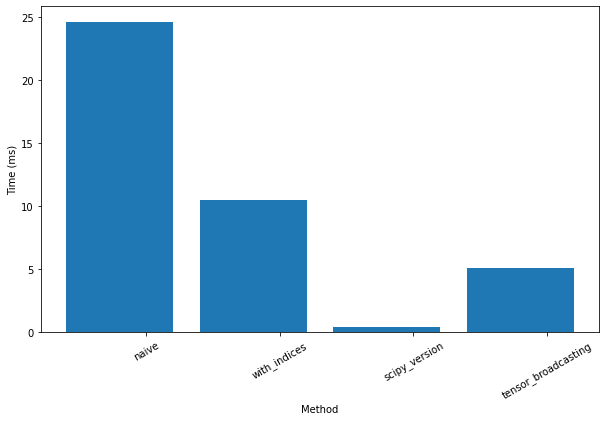

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()

## taskC

In [10]:
#task C

from numpy.random import rand, randn
n, d, k = 100, 2,2
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

np.array(means)[:,0]

array([0.69872366, 0.25997411])

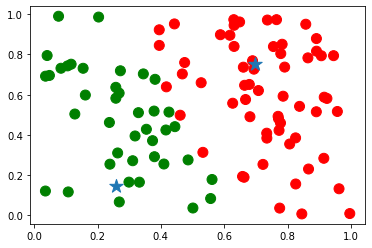

In [11]:
import math 
def log_likelihood(X, mu, sigma): 
        def step(x):
            denom = (2*math.pi)**(d/2) * np.linalg.det(sigma)**0.5
            num = math.exp(-0.5 * (x-mu).transpose().dot(np.linalg.inv(sigma)).dot(x-mu))
            return np.log(num/denom)
        return np.apply_along_axis(step, 1, X)
       
log_ps = [log_likelihood(X, m, s) for m, s in zip(means, sigmas)] 

assignments = np.argmax(log_ps, 0) 
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()